<a href="https://colab.research.google.com/github/aaolcay/Convolutional-Neural-Network-Examples/blob/main/Fashion_mnist_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authenticate Drive Account**

In [127]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


**See What Is In the Folder**

In [128]:
import os
os.chdir('/gdrive/My Drive/Convolutional Neural Networks')
!ls

Fashion_mnist_Transfer_Learning.ipynb
mnist_dataset_Sequential_model.ipynb
model_fashion-mnist_cnn_train2_epoch24.h5


**Transfer Learning: `model_fashion-mnist_cnn_train2_epoch24.h5` will be used as a model in this CNN implementation.**

In [129]:
# Import Libraries
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

**Load `fashion_mnist` dataset**

In [130]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**See what we have**

The train data has 60000 samples and its size is 28x28
The test data has 10000 samples and its size is 28x28
Summary of shapes:
x_train:(60000, 28, 28)
x_test:(10000, 28, 28)


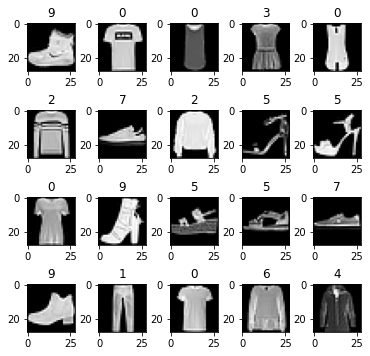

In [131]:
print(f'The train data has {x_train.shape[0]} samples and its size is {x_train.shape[1]}x{x_train.shape[2]}')
print(f'The test data has {x_test.shape[0]} samples and its size is {x_test.shape[1]}x{x_test.shape[2]}')
print(f'Summary of shapes:\nx_train:{x_train.shape}\nx_test:{x_test.shape}')

fig = plt.figure(figsize=(5,5))
for i in range(20):
  fig.add_subplot(4,5,i+1)
  plt.imshow(x_train[i,:,:], cmap='gray')
  plt.title(f'{y_train[i]}')
  fig.tight_layout(pad=0.2)

As seen the labels given range from 0 to 9, but they can also be named as below:

**0 : T-shirt/top**

**1 : Trouser**

**2 : Pullover**

**3 : Dress**

**4 : Coat**

**5 : Sandal**

**6 : Shirt**

**7 : Sneaker**

**8 : Bag**

**9 : Ankle boot**

In [132]:
labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])

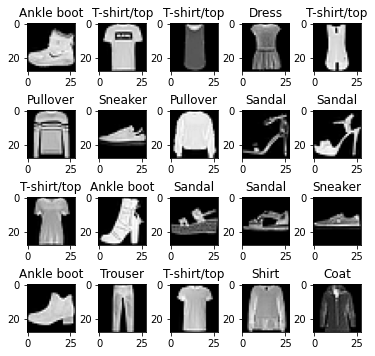

In [133]:
fig = plt.figure(figsize=(5,5))
for i in range(20):
  fig.add_subplot(4,5,i+1)
  plt.imshow(x_train[i,:,:], cmap='gray')
  plt.title(f'{labels[y_train[i]]}')
  fig.tight_layout(pad=0.2)

**Load model -> Transfer Learning**

In [134]:
model = keras.models.load_model('/gdrive/My Drive/Convolutional Neural Networks/model_fashion-mnist_cnn_train2_epoch24.h5')


**See What This Model Has**

In [135]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      

**See the Weights This Model Has**

In [136]:
print(model.get_weights())

[array([[[[ 0.17816941, -0.07594889,  0.01751388, -0.07010195,
          -0.12995331,  0.22557805, -0.30936214, -0.11792234,
          -0.1167527 , -0.15872207,  0.03488588, -0.01928578,
          -0.26763397, -0.14142227, -0.07556668,  0.04426898,
           0.0195538 ,  0.2905073 , -0.17344749,  0.08937727,
           0.3093847 ,  0.03752402, -0.27243918,  0.06543485,
          -0.21943635, -0.06422845,  0.08732945,  0.20154914,
          -0.08639247,  0.04106397, -0.36443895, -0.24613135]],

        [[ 0.1562184 , -0.00872533,  0.07874383,  0.32733646,
          -0.00293411, -0.06841107, -0.20776227, -0.11748354,
          -0.10213827, -0.05494253, -1.1055311 ,  0.28027445,
          -0.11722068,  0.07417959, -0.41153336, -0.7363281 ,
           0.19442675,  0.03723838,  0.28694642, -0.16290578,
           0.14526236, -0.02390439, -0.09273348,  0.14532481,
           0.12748139,  0.12702218,  0.1595669 , -0.0271089 ,
           0.20488393,  0.01679843,  0.0190246 , -0.18906684]],

 

**See Which Optimizer Was Used**

In [137]:
model.optimizer

**Reshape Data For Prediction in Model**

In [138]:
x_test_r = x_test[..., np.newaxis]
x_train_r = x_train[..., np.newaxis]
print(f'x_test shape after reshaping: {x_test_r.shape}')
print(f'x_train shape after reshaping: {x_train_r.shape}')

x_test shape after reshaping: (10000, 28, 28, 1)
x_train shape after reshaping: (60000, 28, 28, 1)


**Make Prediction By Using the Model Invoked**

Notice that there is no need for compiling and training the model as it was already compiled and trained with this dataset. This is why we use transfer learning that makes the DL implementation faster and more accurate because its accuracy was also already assessed. 

1/1 [==============================] - 0s 92ms/step


Text(0.5, 1.0, 'prediction:Coat')

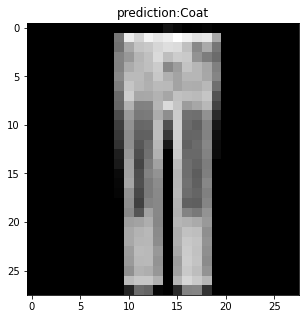

In [139]:
prediction = model.predict(x_test_r[14:15,:,:,:])
prediction = np.argmax(prediction)
prediction = labels[prediction]
plt.figure(figsize=(5,5))
plt.imshow(x_test[15,:,:],cmap='gray')
plt.title(f'prediction:{prediction}')

**Compute the Accuracy of the Model:**



> $accuracy = \frac{T}{T+F}$


T: True predictions 

F: False predictions

In [147]:
T = []
F = []

for iteration in range(200):
  x = x_test_r[iteration,:,:,:]
  x = x[np.newaxis, ...]
  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  if prediction == y_test[iteration]:
    T.append(prediction)
  else:
    F.append(prediction)

1/1 [==============================] - 0s 23ms/step


In [148]:
accuracy = len(T)/(len(T)+len(F))
print(f'Accuracy of the model is: {100*accuracy}%')

Accuracy of the model is: 86.0%
